In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import k
#Finding the roots of the characteristic/auxiliary equation
K = sp.solve(k**2-0.5*k-0.5, k)
K

[-0.500000000000000, 1.00000000000000]

In [2]:
#To help visualise the paths
def mtxofpaths(M):
    B = np.empty((int(np.ceil(M/2)), M))
    for i in range(int(np.ceil(M/2))): 
        for j in range(0, M):  
            B[i][j] = 2*i+j+1
    return B
np.set_printoptions(linewidth=np.inf)
result = mtxofpaths(25)
reformat_result=np.asmatrix(result)
print(reformat_result)

[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25.]
 [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.]
 [ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
 [ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.]
 [ 9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.]
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.]
 [13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37.]
 [15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39.]
 [17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41.]
 [19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.

In [3]:
#Symbolic solution to solving the linear system of equations (the simultaneous equations)
x, y = sp.symbols("x,y")
A = sp.Matrix([[1, 1], [K[0], K[1]]])
b = sp.Matrix([0, 1])
C,= sp.linsolve((A, b), x, y)   # comma = unpacking operator
C

(-0.666666666666667, 0.666666666666667)

In [4]:
#calculates the p_n for a specific n
def p_n(K, C, n):
    p_n = C[0]*(K[0])**n + C[1]*(K[1])**n
    return p_n
p_n(K, C, 25)

0.666666686534882

In [5]:
#calculates p_n for a range of n, 1<=n<=N which are plotted below
def p(K, C, N):
    p = np.empty(N)
    for n in range(1, N+1):
        p_n = C[0]*(K[0])**n + C[1]*(K[1])**n
        p[n-1]=p_n
    return p
p(K,C,25)

array([1.        , 0.5       , 0.75      , 0.625     , 0.6875    , 0.65625   , 0.671875  , 0.6640625 , 0.66796875, 0.66601562, 0.66699219, 0.66650391, 0.66674805, 0.66662598, 0.66668701, 0.66665649, 0.66667175, 0.66666412, 0.66666794, 0.66666603, 0.66666698, 0.66666651, 0.66666675, 0.66666663, 0.66666669])

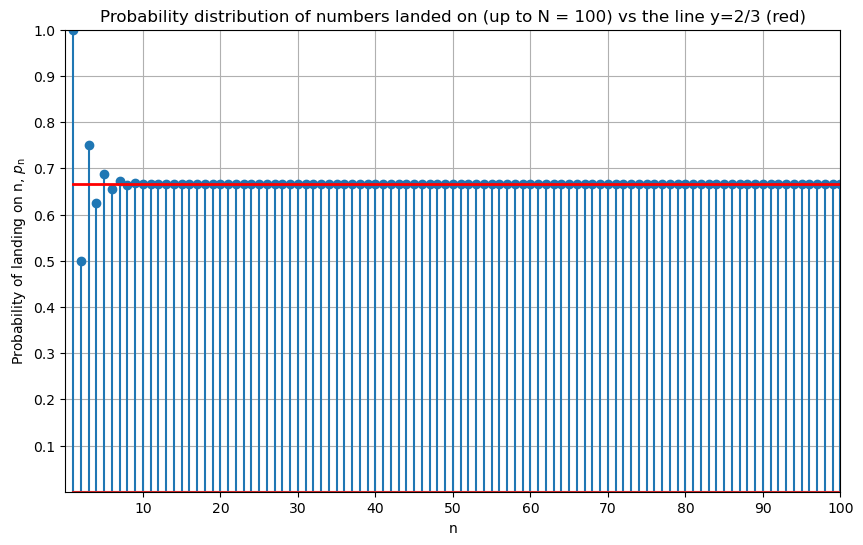

In [6]:
#Plot the probability distribution of these p_ns generates from the p(K, C, N) function
Nmax=100
x=np.arange(1, Nmax+1)
y=p(K, C, Nmax)
plt.figure(figsize=(10,6))
plt.stem(x, y)
constfunc = 2/3+np.zeros(Nmax)
plt.plot(x, constfunc, color='red', linestyle='-', linewidth=2)
plt.xlim(0, 100)
plt.ylim(0, 1)
plt.xticks(10*np.arange(1, 11))
plt.yticks(np.arange(1, 11)/10)
plt.xlabel("n")
plt.ylabel("Probability of landing on n, $p_{\mathrm{n}}$")
plt.title("Probability distribution of numbers landed on (up to N = 100) vs the line y=2/3 (red)")
plt.grid(True)
plt.show()

